<a href="https://colab.research.google.com/github/tlmartiner/Integracion_de_datos_y_prospectiva/blob/main/3_Muestreo_LDA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de Estudio**

Describir el caso de estudio y las variables que lo definen.

0. Cargar las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se carga la función de histograma

In [ ]:
# @title 1. Método: Histograma de Frecuencias
# Variables de Entrada: Distribución de las Pérdidas
# Variables de Salida: Limite Inferior, Limite Superior, Número de Datos
# Marca de Clase del Histograma de Frecuencias.
def Histx(LDA): #Nombre de su método

  NC=10  #Número de Clusters

  plt.figure()
  sns.histplot(LDA,kde=True,bins=NC,color='red')
  plt.title('Distribución LDA')
  plt.show()

  #Obtenemos la información de la Distribución
  counts, bin_edges=np.histogram(LDA,bins=NC)
  LI=bin_edges[:-1];LS=bin_edges[1:]
  mc=(LI+LS)/2 #El valor representativo de cada intervalo
  freq=counts/np.sum(counts)

  return LI,LS,counts,mc,freq

2. Se cargan los datos de trabajo

,Unnamed: 0,Edad,Genero,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.091441
5838,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.066962
5839,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.165936
5840,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.247763


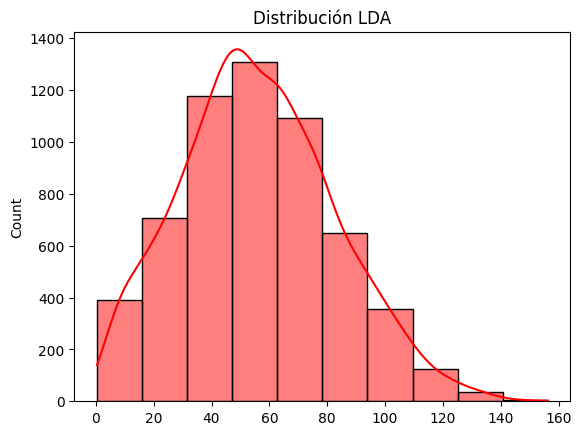

,LI,LS,mc,ND,Freq
0,0.388425,15.974978,8.181701,392,0.067100
1,15.974978,31.561531,23.768254,706,0.120849
2,31.561531,47.148084,39.354807,1175,0.201130
3,47.148084,62.734637,54.941360,1307,0.223725
4,62.734637,78.321190,70.527913,1091,0.186751
5,78.321190,93.907743,86.114466,647,0.110750
6,93.907743,109.494295,101.701019,355,0.060767
7,109.494295,125.080848,117.287572,126,0.021568
8,125.080848,140.667401,132.874125,37,0.006333
9,140.667401,156.253954,148.460678,6,0.001027


In [ ]:
nxl = '/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/6. SolicitantesCrédito(USD).xlsx'
XDB = pd.read_excel(nxl, sheet_name = 1)
display(XDB)

#Se calcula la distribución LDA
LDA = XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
XDB['LDA'] = LDA

LI, LS, counts, mc, freq = Histx(LDA)
df = pd.DataFrame({'LI': LI, 'LS': LS, 'mc': mc, 'ND' : counts, 'Freq': freq})
display(df)
df.to_excel('Histograma.xlsx')

3. Muestreo Aleatorio - Utilizando el Método de Montecarlo

10000


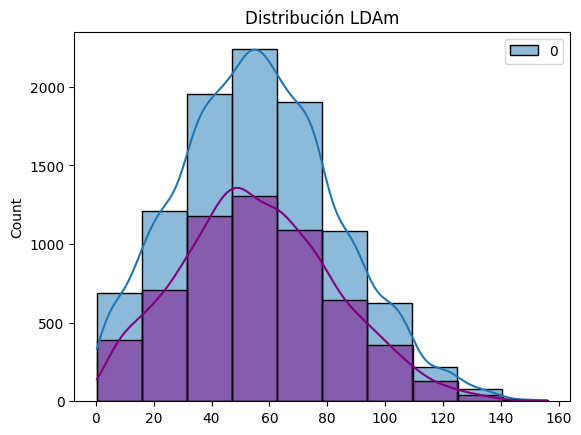

In [ ]:
acum = np.cumsum(freq)
Confiabilidad = 9999 + 1 #Confiabilidad de 99,99%
print(Confiabilidad)

LDAm = np.zeros((Confiabilidad, 1))  #LDAm = LDA muestreada, la variable muestreada

for k in range(Confiabilidad):
  al = np.random.uniform(0,1)  #Es el aleatorio entre cero y uno
  inter = np.where(al <= acum) [0][0]
  #print("Limite inferior:", LI[inter])
  #print("Limite superior:", LS[inter])
  LDAm[k,] = np.random.uniform(LI[inter], LS[inter])
  #print("El número seleccionado es:", LDAm[k,])

plt.figure()
sns.histplot(LDAm, kde=True, bins=10, color='green')
sns.histplot(LDA, kde=True, bins=10, color='purple') # Se grafica la LDA original
plt.title('Distribución LDAm')
plt.show()

4. Prueba del muestreo

In [ ]:
from scipy.stats import skew,kurtosis

print("Información LDA original")
print("La media es:", np.mean(LDA))
print("La varianza es:", np.var(LDA))
print("El coeficiente de asimetría es:", skew(LDA))
print("El coeficiente de curtosis es:", kurtosis(LDA))

print("Información LDA muestreada")
print("La media es:", np.mean(LDAm))
print("La varianza es:", np.var(LDAm))
print("El coeficiente de asimetría es:", skew(LDAm))
print("El coeficiente de curtosis es:", kurtosis(LDAm))

#Las diferencias entre las metricas son
dif_u = (np.mean(LDA)-np.mean(LDAm))/np.mean(LDA)
print("La diferencia porcentual de las medias es:", dif_u*100)
dif_v = (np.var(LDA)-np.var(LDAm))/np.var(LDA)
print("La diferencia porcentual de las varianzas es:", dif_v*100)
dif_sk = (skew(LDA)-skew(LDAm))/skew(LDA)
print("La diferencia porcentual del coeficiente de asimetría es:", dif_sk*100)
dif_ku = (kurtosis(LDA)-kurtosis(LDAm))/kurtosis(LDA)
print("La diferencia porcentual del coeficiente de curtosis es:", dif_ku*100)

Información LDA original
La media es: 56.05296470592385
La varianza es: 714.3667152538843
El coeficiente de asimetría es: 0.28830609042395505
El coeficiente de curtosis es: -0.2302352715704683
Información LDA muestreada
La media es: 56.09288592945195
La varianza es: 754.8781239842484
El coeficiente de asimetría es: [0.2741224]
El coeficiente de curtosis es: [-0.23414662]
La diferencia porcentual de las medias es: -0.07122053889129101
La diferencia porcentual de las varianzas es: -5.6709541283661915
La diferencia porcentual del coeficiente de asimetría es: [4.91966282]
La diferencia porcentual del coeficiente de curtosis es: [-1.69884948]


##**Análisis de resultados**
De acuerdo con el mustreo aleatorio, se puede observar que a medida que la confiabilidad de los datos va en aumento, las métricas estadísticas de tendencia central de la distribución muestreada tienden a tener comportamientos similares a las métricas de tendencia central de la variable de referencia. Esto se puede corroborar a partir de las diferencias entre dichas métricas, se puede observar que la media y el coeficiente lograron diferencias por debajo de 1% en promedio (media, coeficiente de asímetría), mientras que el coeficiente de Kurtosis, y la varianza lograron diferencias cercanas al 7% en promedio, lo que es aceptable frene a este tipo de procesos de integración de datos. Este 7% está muy cercano al 5% que define la teoría de las colas, donde las diferencias por debajo del 5%, representan errores muy bajos en el modelamiento de variables.
